In [50]:
!pip install ordinalgbt shap

In [51]:
from ordinalgbt.lgb import LGBMOrdinal
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.stats import uniform, loguniform, randint

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import shap
from shap import TreeExplainer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from ordinalgbt.data import make_ordinal_classification
from ordinalgbt.lgb import LGBMOrdinal

In [53]:
import warnings
warnings.filterwarnings("ignore")

In [54]:
test_df = pd.read_csv('/Users/liusiyi/Desktop/BT4240/Group Project/dataset/test_data_v2.csv')
valid_df = pd.read_csv('/Users/liusiyi/Desktop/BT4240/Group Project/dataset/validate_data_v2.csv')
train_df = pd.read_csv('/Users/liusiyi/Desktop/BT4240/Group Project/dataset/train_data_v2.csv')

In [55]:
train_df.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Distance(mi)', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Duration',
       'Region', 'State_CA', 'State_FL', 'State_Others', 'State_TX',
       'City_Charlotte', 'City_Houston', 'City_Los Angeles', 'City_Miami',
       'City_Orlando', 'City_Others', 'Weather_Condition_Clear / Cloudy',
       'Weather_Condition_Fog / Low Visibility', 'Weather_Condition_Others',
       'Weather_Condition_Rain', 'Weather_Condition_Snow',
       'Weather_Condition_Thunderstorms / Severe Weather', 'Weather_Year',
       'Weather_Month', 'Weather_Day', 'Weather_Hour', 'Wind_Direction_CALM',
       'Wind_Direction_E', 'Wind_Direction_ENE', 'Wind_Direction_ESE',
       'Wind_Direction_East', 'Wind_Direction_N', '

In [56]:
train_df.dtypes

Severity                           int64
Start_Time                         int64
End_Time                           int64
Distance(mi)                     float64
Temperature(F)                   float64
                                  ...   
Weather_Day_of_Week_Saturday       int64
Weather_Day_of_Week_Sunday         int64
Weather_Day_of_Week_Thursday       int64
Weather_Day_of_Week_Tuesday        int64
Weather_Day_of_Week_Wednesday      int64
Length: 75, dtype: object

In [57]:
train_df.head()

,Severity,Start_Time,End_Time,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),...,Wind_Direction_WNW,Wind_Direction_WSW,Wind_Direction_West,Weather_Day_of_Week_Friday,Weather_Day_of_Week_Monday,Weather_Day_of_Week_Saturday,Weather_Day_of_Week_Sunday,Weather_Day_of_Week_Thursday,Weather_Day_of_Week_Tuesday,Weather_Day_of_Week_Wednesday
0,1,342,372,0.0,77.0,88.0,29.81,10.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,1,907,922,0.0,75.0,65.0,28.84,20.0,17.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,1,603,649,0.0,79.0,84.0,29.80,10.0,3.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,1,484,544,0.0,82.0,79.0,29.98,10.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,1,963,993,0.0,86.0,55.0,29.91,10.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [58]:
train_X = train_df.drop(columns=['Severity'],inplace=False)
train_y = train_df['Severity']
valid_X = valid_df.drop(columns=['Severity'],inplace=False)
valid_y = valid_df['Severity']
test_X = test_df.drop(columns=['Severity'],inplace=False)
test_y = test_df['Severity']

In [59]:
print(train_X.shape)
print(test_X.shape)

(8000, 74)
(1000, 74)


In [60]:
print(train_y)

0       1
1       1
2       1
3       1
4       1
       ..
7995    4
7996    4
7997    4
7998    4
7999    4
Name: Severity, Length: 8000, dtype: int64


In [61]:
encoder = LabelEncoder()
train_y1 = encoder.fit_transform(train_y)
valid_y1 = encoder.transform(valid_y)
test_y1 = encoder.transform(test_y)


train_y1

array([0, 0, 0, ..., 3, 3, 3])

# Baseline Model

In [62]:
model = LGBMOrdinal()
model.fit(train_X, train_y1)

LGBMOrdinal(objective=<function LGBMOrdinal._lgb_loss_factory.<locals>.loss at 0x28ee04d30>)

In [63]:
y_pred = model.predict(valid_X)
y_pred_prob = model.predict_proba(valid_X)

## Model Evaluation

### Confusion Matrix

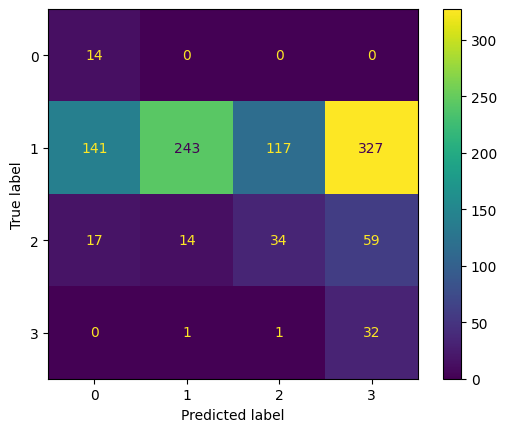

In [64]:
ConfusionMatrixDisplay.from_predictions(valid_y1, y_pred)

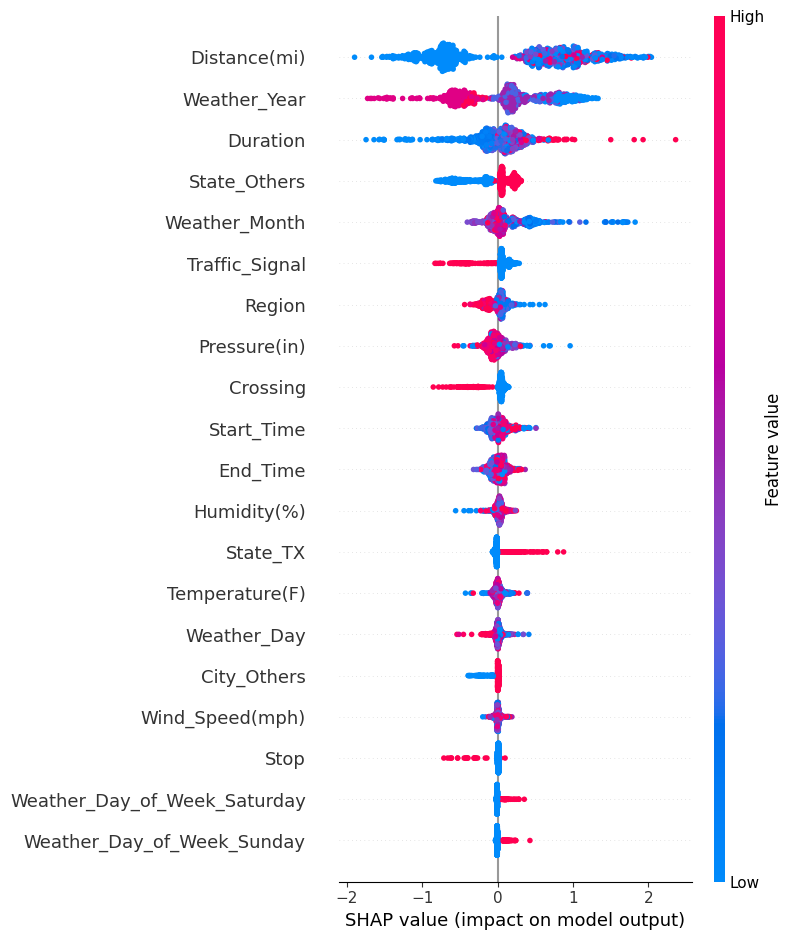

In [65]:
explainer = TreeExplainer(model, model_output='raw')
shap_values = explainer.shap_values(valid_X)
shap.summary_plot(shap_values,valid_X)

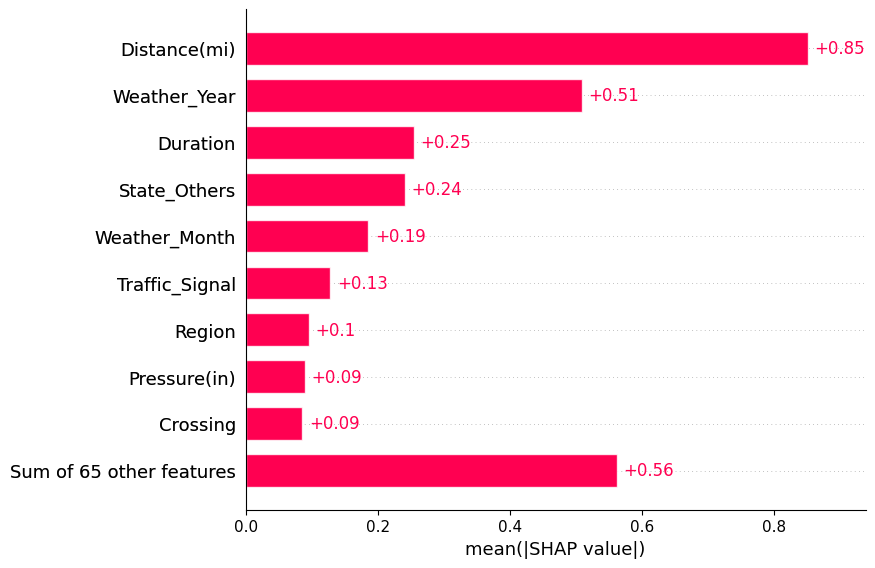

In [66]:
shap_values = explainer(valid_X)
shap.plots.bar(shap_values)

### Mean Average Error

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, f1_score, cohen_kappa_score, classification_report, accuracy_score
from scipy.stats import kendalltau

In [68]:

accuracy = accuracy_score(valid_y1, y_pred)
tolerance_accuracy = np.mean(np.abs(valid_y1 - y_pred) <= 1)
f1_macro = f1_score(valid_y1, y_pred, average="macro")
f1_weighted = f1_score(valid_y1, y_pred, average="weighted")
tau, _ = kendalltau(valid_y1, y_pred)
kappa_weighted = cohen_kappa_score(valid_y1, y_pred, weights="quadratic")


print("Accuracy:", accuracy)
print("Accuracy within 1 class:", tolerance_accuracy)
print("F1-score (Macro):", f1_macro)
print("F1-score (Weighted):", f1_weighted)
print("Kendall's Tau:", tau)
print("Weighted Kappa:", kappa_weighted)
print(classification_report(valid_y1, y_pred))

Accuracy: 0.323
Accuracy within 1 class: 0.655
F1-score (Macro): 0.24650529462787088
F1-score (Weighted): 0.4080138472755255
Kendall's Tau: 0.19600900222841874
Weighted Kappa: 0.13513688277467484
              precision    recall  f1-score   support

           0       0.08      1.00      0.15        14
           1       0.94      0.29      0.45       828
           2       0.22      0.27      0.25       124
           3       0.08      0.94      0.14        34

    accuracy                           0.32      1000
   macro avg       0.33      0.63      0.25      1000
weighted avg       0.81      0.32      0.41      1000



### ROC

In [69]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

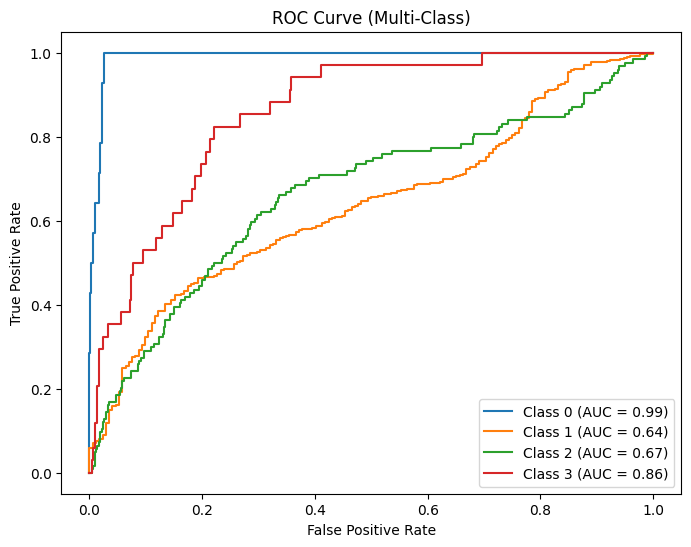

In [70]:
y_true_bin = label_binarize(valid_y1, classes=np.unique(valid_y1))

n_classes = y_true_bin.shape[1]
plt.figure(figsize=(8,6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multi-Class)")
plt.legend()
plt.show()

## Evaluate on Test set

Accuracy: 0.301
Accuracy within 1 class: 0.645
F1-score (Macro): 0.1957421134265037
F1-score (Weighted): 0.40901491738384305
Kendall's Tau: 0.14962284187053335
Weighted Kappa: 0.08581835019410222
              precision    recall  f1-score   support

           0       0.04      1.00      0.07         6
           1       0.94      0.30      0.45       857
           2       0.16      0.21      0.18       119
           3       0.04      0.94      0.08        18

    accuracy                           0.30      1000
   macro avg       0.30      0.61      0.20      1000
weighted avg       0.83      0.30      0.41      1000



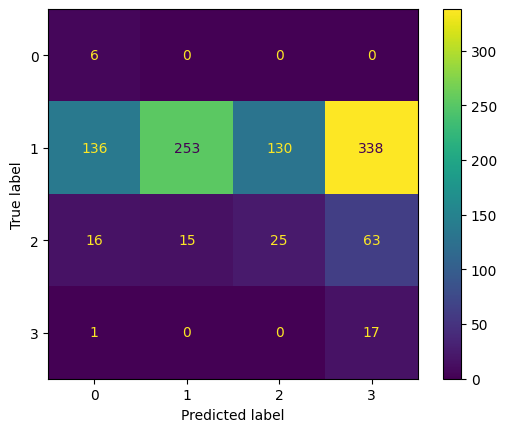

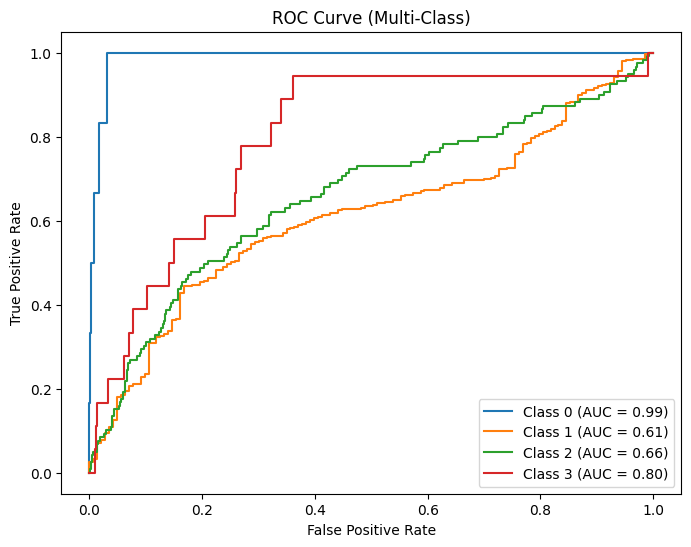

In [71]:
y_pred = model.predict(test_X)
y_pred_prob = model.predict_proba(test_X)

accuracy = accuracy_score(test_y1, y_pred)
tolerance_accuracy = np.mean(np.abs(test_y1 - y_pred) <= 1)
f1_macro = f1_score(test_y1, y_pred, average="macro")
f1_weighted = f1_score(test_y1, y_pred, average="weighted")
tau, _ = kendalltau(test_y1, y_pred)
kappa_weighted = cohen_kappa_score(test_y1, y_pred, weights="quadratic")


print("Accuracy:", accuracy)
print("Accuracy within 1 class:", tolerance_accuracy)
print("F1-score (Macro):", f1_macro)
print("F1-score (Weighted):", f1_weighted)
print("Kendall's Tau:", tau)
print("Weighted Kappa:", kappa_weighted)
print(classification_report(test_y1, y_pred))

ConfusionMatrixDisplay.from_predictions(test_y1, y_pred)

y_true_bin = label_binarize(test_y1, classes=np.unique(test_y1))

n_classes = y_true_bin.shape[1]
plt.figure(figsize=(8,6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multi-Class)")
plt.legend()
plt.show()

## Evaluate In sample performance

Accuracy: 0.6315
Accuracy within 1 class: 0.88725
F1-score (Macro): 0.5893706132391454
F1-score (Weighted): 0.5893706132391454
Kendall's Tau: 0.7126906188809585
Weighted Kappa: 0.7599408478475189
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      2000
           1       0.73      0.37      0.49      2000
           2       0.58      0.23      0.33      2000
           3       0.52      0.94      0.67      2000

    accuracy                           0.63      8000
   macro avg       0.65      0.63      0.59      8000
weighted avg       0.65      0.63      0.59      8000



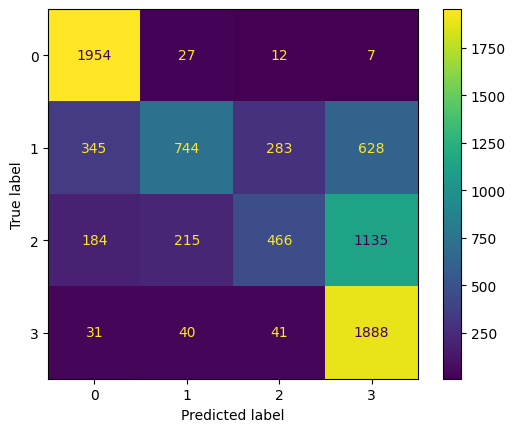

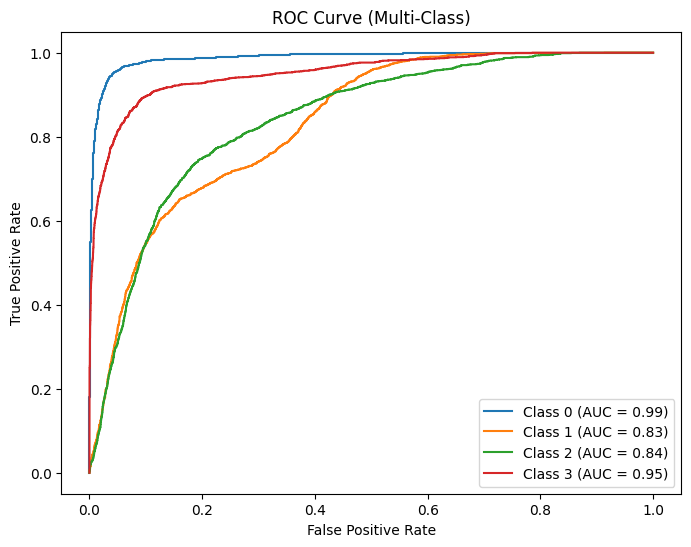

In [72]:
y_pred = model.predict(train_X)
y_pred_prob = model.predict_proba(train_X)

accuracy = accuracy_score(train_y1, y_pred)
tolerance_accuracy = np.mean(np.abs(train_y1 - y_pred) <= 1)
f1_macro = f1_score(train_y1, y_pred, average="macro")
f1_weighted = f1_score(train_y1, y_pred, average="weighted")
tau, _ = kendalltau(train_y1, y_pred)
kappa_weighted = cohen_kappa_score(train_y1, y_pred, weights="quadratic")


print("Accuracy:", accuracy)
print("Accuracy within 1 class:", tolerance_accuracy)
print("F1-score (Macro):", f1_macro)
print("F1-score (Weighted):", f1_weighted)
print("Kendall's Tau:", tau)
print("Weighted Kappa:", kappa_weighted)
print(classification_report(train_y1, y_pred))

ConfusionMatrixDisplay.from_predictions(train_y1, y_pred)

y_true_bin = label_binarize(train_y1, classes=np.unique(train_y1))

n_classes = y_true_bin.shape[1]
plt.figure(figsize=(8,6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multi-Class)")
plt.legend()
plt.show()

# Fine-tuning

In [73]:
!pip install scikit-optimize

In [74]:
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, DeltaYStopper
from skopt.space import Real, Categorical, Integer

# from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import make_scorer, cohen_kappa_score

In [75]:
def evaluate_results(y_pred, y_pred_prob, y_true):
    

    accuracy = accuracy_score(y_true, y_pred)
    tolerance_accuracy = np.mean(np.abs(y_true - y_pred) <= 1)
    f1_macro = f1_score(y_true, y_pred, average="macro")
    f1_weighted = f1_score(y_true, y_pred, average="weighted")
    tau, _ = kendalltau(y_true, y_pred)
    kappa_weighted = cohen_kappa_score(y_true, y_pred, weights="quadratic")



    print("Accuracy:", accuracy)
    print("Accuracy within 1 class:", tolerance_accuracy)
    print("F1-score (Macro):", f1_macro)
    print("F1-score (Weighted):", f1_weighted)
    print("Kendall's Tau:", tau)
    print("Weighted Kappa:", kappa_weighted)
    print(classification_report(y_true, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

    y_true_bin = label_binarize(y_true, classes=np.unique(y_true))

    n_classes = y_true_bin.shape[1]
    plt.figure(figsize=(8,6))

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve (Multi-Class)")
    plt.legend()
    plt.show()

def tune_evaluate(scoring, search_spaces, train_X, train_y, test_X, test_y):
    model = LGBMOrdinal()
    opt = BayesSearchCV(estimator=model,                                    
                    search_spaces=search_spaces,                      
                    scoring=scoring,                           
                    cv=5,                                           
                    n_iter=60,
                    n_points=3,
                    n_jobs=-1,
                    iid=False,
                    return_train_score=False,                         
                    refit=True,                                      
                    optimizer_kwargs={'base_estimator': 'GP'},        
                    random_state=42)
    
    opt.fit(train_X, train_y)
    best_model = opt.best_estimator_
    print("Best optimzer score: ", opt.best_score_)
    print("Best parameters: ", opt.best_params_)

    print("######### Evaluate Test Data Fit #########")
    y_pred = best_model.predict(test_X)
    y_pred_prob = best_model.predict_proba(test_X)

    evaluate_results(y_pred, y_pred_prob, test_y)

    print("######### Evaluate Train Data Fit #########")
    y_pred = best_model.predict(train_X)
    y_pred_prob = best_model.predict_proba(train_X)

    evaluate_results(y_pred, y_pred_prob, train_y)

    return best_model, opt.best_params_
    

In [76]:
def random_search_evaluate(search_spaces, train_X, train_y, test_X, test_y):
    model = LGBMOrdinal()
    random_search = RandomizedSearchCV(model, param_distributions=search_spaces, n_iter=20, cv=5, scoring="accuracy", random_state=42)
    random_search.fit(train_X, train_y)
    
    best_model = random_search.best_estimator_
    print("Best parameters: ", random_search.best_params_)

    y_pred = best_model.predict(test_X)
    y_pred_prob = best_model.predict_proba(test_X)

    evaluate_results(y_pred, y_pred_prob, test_y)

    return best_model, random_search.best_params_

In [77]:
def grid_search_evaluate(search_spaces, train_X, train_y, test_X, test_y):
    model = LGBMOrdinal()
    grid_search = GridSearchCV(model, param_grid=search_spaces, cv=5, scoring="accuracy")
    grid_search.fit(train_X, train_y)
    
    best_model = grid_search.best_estimator_
    print("Best parameters: ", grid_search.best_params_)

    y_pred = best_model.predict(test_X)
    y_pred_prob = best_model.predict_proba(test_X)

    evaluate_results(y_pred, y_pred_prob, test_y)

    return best_model, grid_search.best_params_

## F1

/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Best optimzer score:  0.15895436008036912
Best parameters:  OrderedDict([('colsample_bytree', 1.0), ('learning_rate', 0.6021720217301674), ('max_depth', -1), ('n_estimators', 2199), ('num_leaves', 365), ('reg_alpha', 0.5), ('reg_lambda', 0.5), ('subsample', 1.0), ('subsample_freq', 2)])
######### Evaluate Test Data Fit #########
Accuracy: 0.365
Accuracy within 1 class: 0.71
F1-score (Macro): 0.2749769060794158
F1-score (Weighted): 0.4429028005804936
Kendall's Tau: 0.11747217385738058
Weighted Kappa: 0.1023821168275022
              precision    recall  f1-score   support

           0       0.11      1.00      0.20        14
           1       0.89      0.33      0.49       828
           2       0.20      0.39      0.27       124
           3       0.08      0.79      0.15        34

    accuracy                           0.36      1000
   macro avg       0.32      0.63      0.27      1000
weighted avg       0.77      0.36      0.44      1000



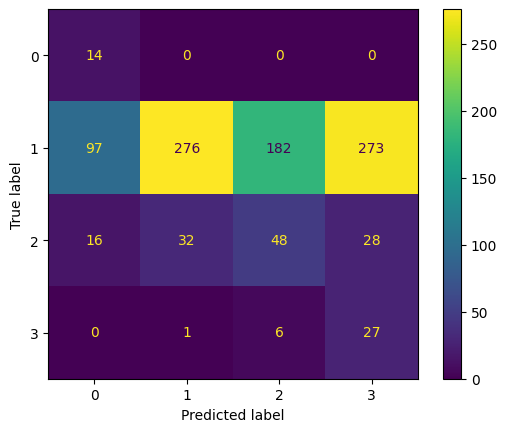

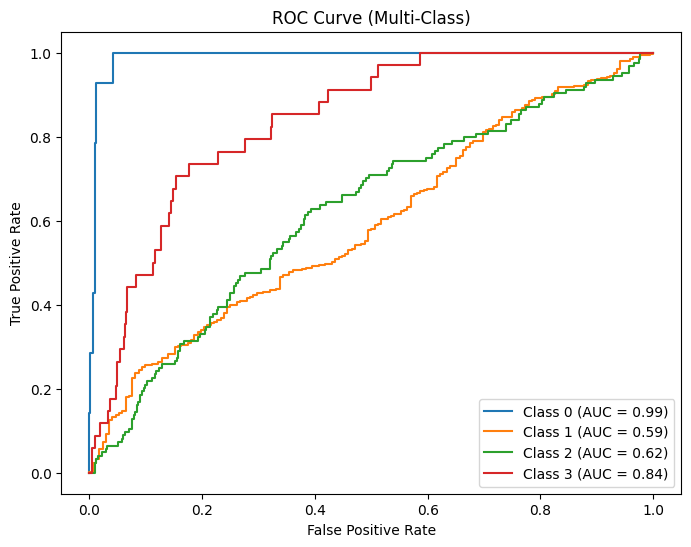

######### Evaluate Train Data Fit #########
Accuracy: 0.99975
Accuracy within 1 class: 1.0
F1-score (Macro): 0.9997500312109512
F1-score (Weighted): 0.9997500312109511
Kendall's Tau: 0.9998333541562533
Weighted Kappa: 0.9998999899989999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2000
           2       1.00      1.00      1.00      2000
           3       1.00      1.00      1.00      2000

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



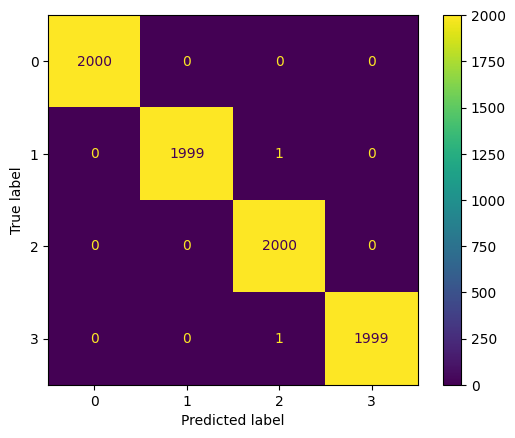

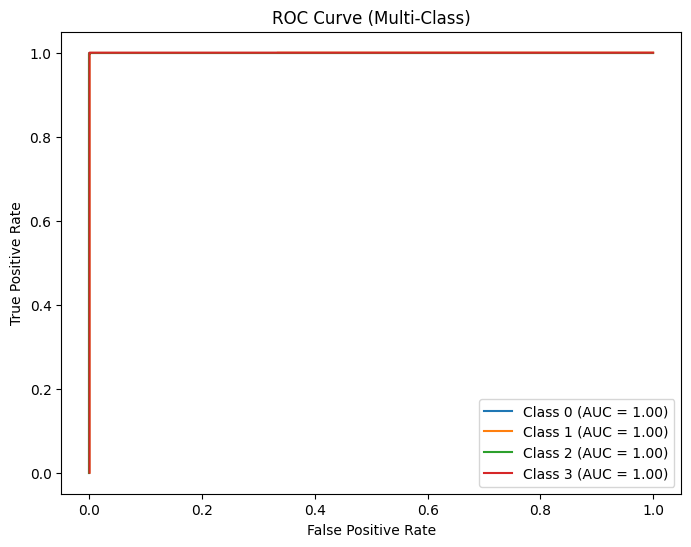

In [78]:

scoring_f1 = make_scorer(f1_score, average="macro", greater_is_better=True)
scoring_qwk = make_scorer(cohen_kappa_score, weights='quadratic')


search_spaces = {
    'learning_rate': Real(0.01, 1.0, 'log-uniform'),
    'n_estimators': Integer(30, 5000),
    'num_leaves': Integer(2, 512),                       # Maximum tree leaves for base learners
    'max_depth': Integer(-1, 256),                       # Maximum tree depth for base learners, <=0 means no limit
    'subsample': Real(0.01, 1.0, 'uniform'),             # Subsample ratio of the training instance
    'subsample_freq': Integer(1, 10),                    # Frequency of subsample, <=0 means no enable
    'colsample_bytree': Real(0.01, 1.0, 'uniform'),      # Subsample ratio of columns when constructing each tree
    'reg_lambda': Real(0.5, 100.0, 'log-uniform'),      # L2 regularization
    'reg_alpha': Real(0.5, 100.0, 'log-uniform'),       # L1 regularization
   }

best_model_f1_1, best_params_f1_1 = tune_evaluate(scoring_f1, search_spaces, train_X, train_y1, valid_X, valid_y1)

In [79]:
# search_spaces = {
#     'learning_rate': Real(0.01, 1.0, 'log-uniform'),
#     'n_estimators': Integer(30, 5000),
#     'num_leaves': Integer(2, 512),                       # Maximum tree leaves for base learners
#     'max_depth': Integer(-1, 256),                       # Maximum tree depth for base learners, <=0 means no limit
#     'subsample': Real(0.01, 1.0, 'uniform'),             # Subsample ratio of the training instance
#     'subsample_freq': Integer(1, 10),                    # Frequency of subsample, <=0 means no enable
#     'colsample_bytree': Real(0.01, 1.0, 'uniform'),      # Subsample ratio of columns when constructing each tree
#     'reg_lambda': Real(1e-9, 100.0, 'log-uniform'),      # L2 regularization
#     'reg_alpha': Real(1e-9, 100.0, 'log-uniform'),       # L1 regularization
#    }

# best_model, best_params = tune_evaluate(scoring_f1, search_spaces, train_X, train_y1, valid_X, valid_y1)

## Weighted F1

/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Best optimzer score:  0.15895436008036912
Best parameters:  OrderedDict([('colsample_bytree', 1.0), ('learning_rate', 0.6021720217301674), ('max_depth', -1), ('n_estimators', 2199), ('num_leaves', 365), ('reg_alpha', 0.5), ('reg_lambda', 0.5), ('subsample', 1.0), ('subsample_freq', 2)])
######### Evaluate Test Data Fit #########
Accuracy: 0.365
Accuracy within 1 class: 0.71
F1-score (Macro): 0.2749769060794158
F1-score (Weighted): 0.4429028005804936
Kendall's Tau: 0.11747217385738058
Weighted Kappa: 0.1023821168275022
              precision    recall  f1-score   support

           0       0.11      1.00      0.20        14
           1       0.89      0.33      0.49       828
           2       0.20      0.39      0.27       124
           3       0.08      0.79      0.15        34

    accuracy                           0.36      1000
   macro avg       0.32      0.63      0.27      1000
weighted avg       0.77      0.36      0.44      1000



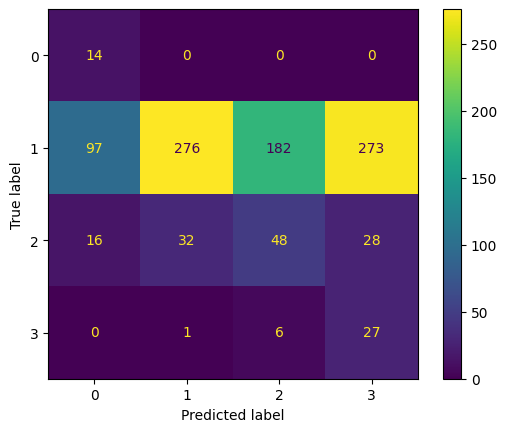

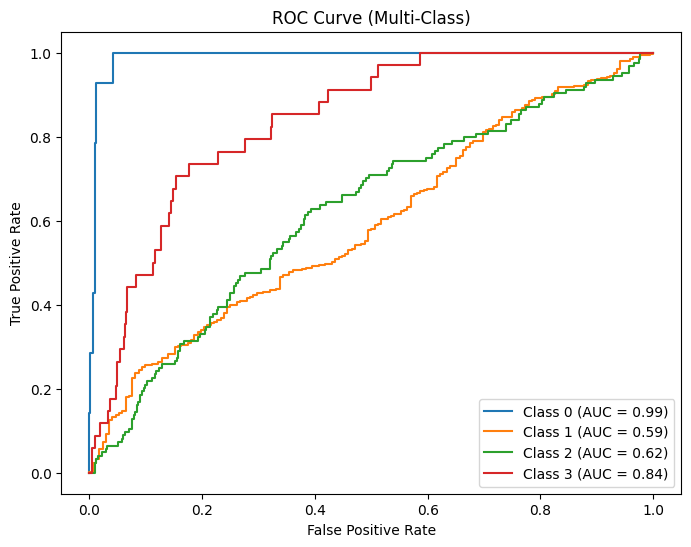

######### Evaluate Train Data Fit #########
Accuracy: 0.99975
Accuracy within 1 class: 1.0
F1-score (Macro): 0.9997500312109512
F1-score (Weighted): 0.9997500312109511
Kendall's Tau: 0.9998333541562533
Weighted Kappa: 0.9998999899989999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2000
           2       1.00      1.00      1.00      2000
           3       1.00      1.00      1.00      2000

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



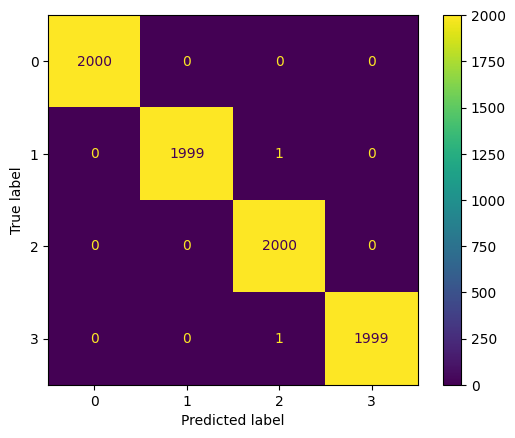

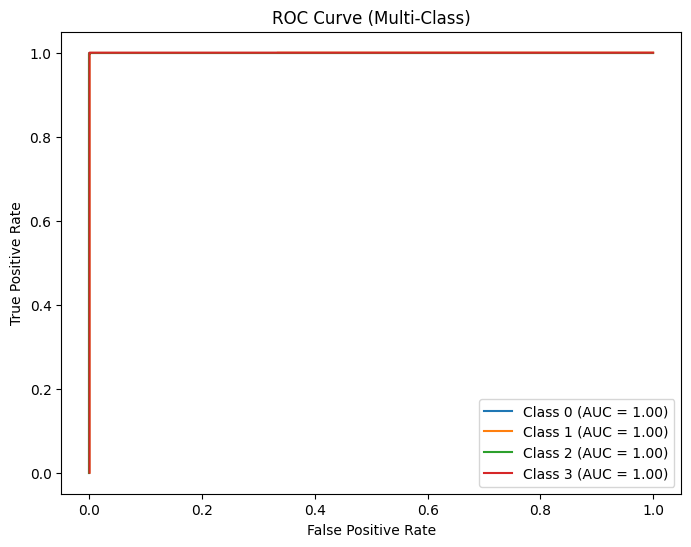

In [80]:
scoring_f1_weighted = make_scorer(f1_score, average="weighted", greater_is_better=True)
best_model, best_params = tune_evaluate(scoring_f1, search_spaces, train_X, train_y1, valid_X, valid_y1)

## Mean Squared Error

Best optimzer score:  -1.4798749999999998
Best parameters:  OrderedDict([('colsample_bytree', 0.9122043743623639), ('learning_rate', 0.5506684967223301), ('max_depth', -1), ('n_estimators', 30), ('num_leaves', 470), ('reg_alpha', 2.933852631511516), ('reg_lambda', 11.827485889641292), ('subsample', 1.0), ('subsample_freq', 5)])
######### Evaluate Test Data Fit #########
Accuracy: 0.431
Accuracy within 1 class: 0.736
F1-score (Macro): 0.30516369546246813
F1-score (Weighted): 0.5138736268285121
Kendall's Tau: 0.1640926144200378
Weighted Kappa: 0.1358927668954869
              precision    recall  f1-score   support

           0       0.14      1.00      0.24        14
           1       0.90      0.42      0.57       828
           2       0.19      0.30      0.24       124
           3       0.09      0.88      0.17        34

    accuracy                           0.43      1000
   macro avg       0.33      0.65      0.31      1000
weighted avg       0.77      0.43      0.51      1000

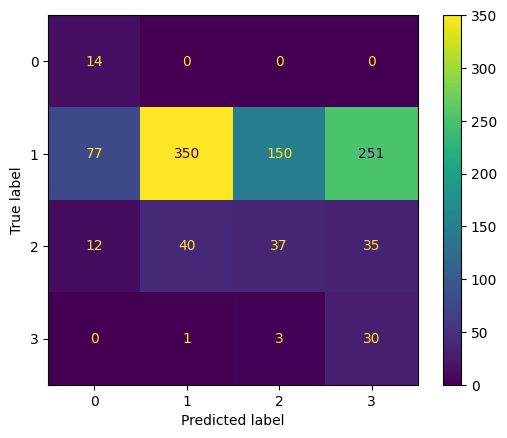

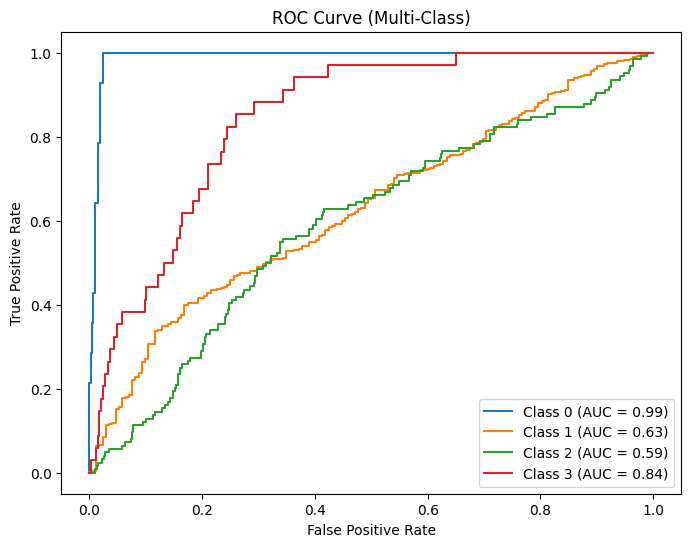

######### Evaluate Train Data Fit #########
Accuracy: 0.8025
Accuracy within 1 class: 0.975
F1-score (Macro): 0.7926420231829332
F1-score (Weighted): 0.792642023182933
Kendall's Tau: 0.8557637080994986
Weighted Kappa: 0.8972826594453264
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2000
           1       0.78      0.75      0.76      2000
           2       0.77      0.52      0.62      2000
           3       0.74      0.96      0.84      2000

    accuracy                           0.80      8000
   macro avg       0.80      0.80      0.79      8000
weighted avg       0.80      0.80      0.79      8000



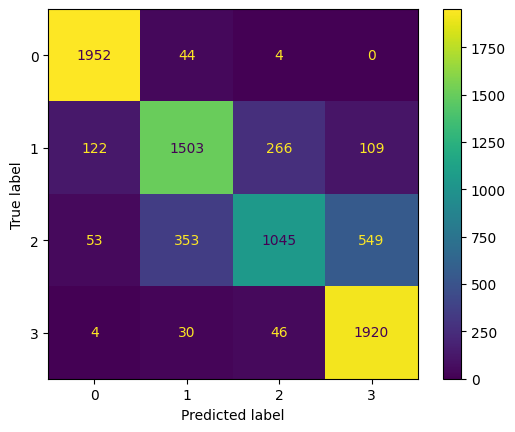

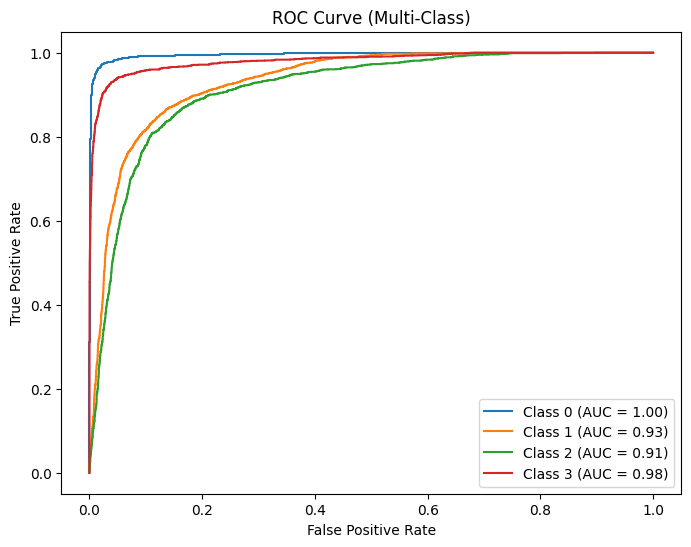

In [81]:
scoring_mse = make_scorer(mean_squared_error, greater_is_better=False)
best_model_mse1, best_params_mse1 = tune_evaluate(scoring_mse, search_spaces, train_X, train_y1, valid_X, valid_y1)

## Mean Absoute Error

Best optimzer score:  -0.9783750000000001
Best parameters:  OrderedDict([('colsample_bytree', 0.9373033299618281), ('learning_rate', 0.5901287526729334), ('max_depth', 90), ('n_estimators', 2630), ('num_leaves', 120), ('reg_alpha', 2.634399198490225), ('reg_lambda', 0.5), ('subsample', 1.0), ('subsample_freq', 10)])
######### Evaluate Test Data Fit #########
Accuracy: 0.393
Accuracy within 1 class: 0.716
F1-score (Macro): 0.2776709626491349
F1-score (Weighted): 0.4803482309118
Kendall's Tau: 0.13677183006615645
Weighted Kappa: 0.10953671579623481
              precision    recall  f1-score   support

           0       0.10      1.00      0.19        14
           1       0.89      0.38      0.53       828
           2       0.21      0.31      0.25       124
           3       0.08      0.74      0.14        34

    accuracy                           0.39      1000
   macro avg       0.32      0.61      0.28      1000
weighted avg       0.77      0.39      0.48      1000



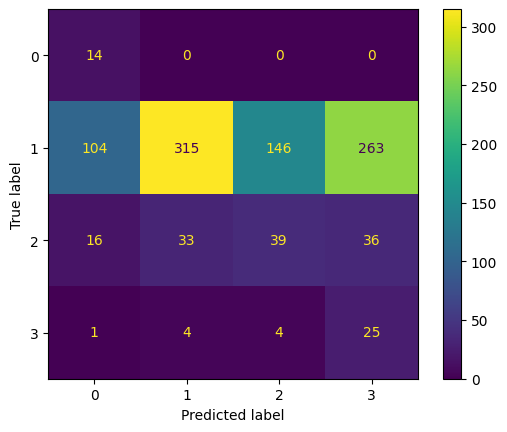

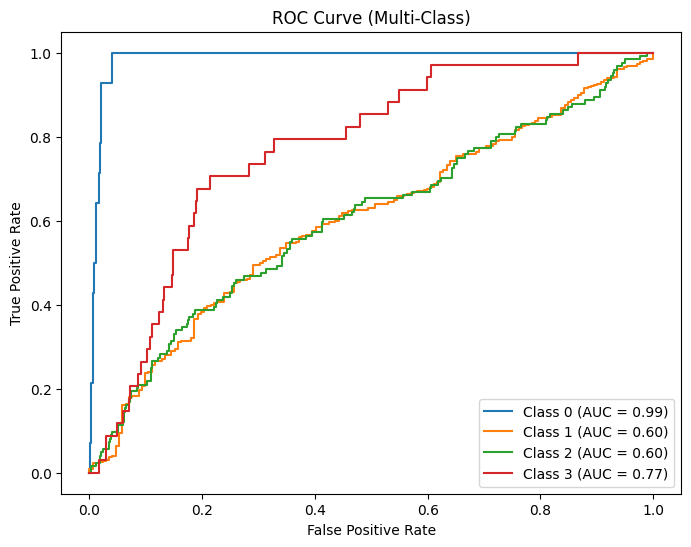

######### Evaluate Train Data Fit #########
Accuracy: 0.95675
Accuracy within 1 class: 0.99975
F1-score (Macro): 0.9560041413130194
F1-score (Weighted): 0.9560041413130194
Kendall's Tau: 0.9725322468006796
Weighted Kappa: 0.9828376401755241
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2000
           1       0.96      0.99      0.97      2000
           2       0.99      0.84      0.91      2000
           3       0.89      1.00      0.94      2000

    accuracy                           0.96      8000
   macro avg       0.96      0.96      0.96      8000
weighted avg       0.96      0.96      0.96      8000



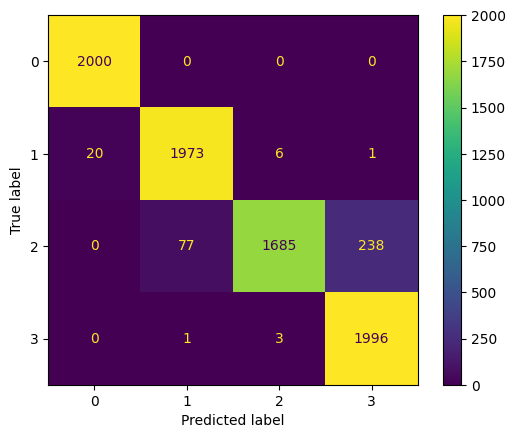

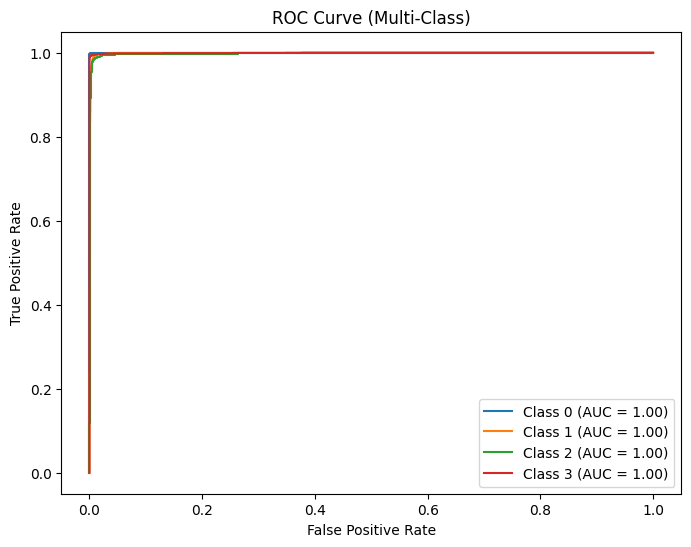

In [82]:
scoring_mae = make_scorer(mean_absolute_error, greater_is_better=False)
best_model, best_params = tune_evaluate(scoring_mae, search_spaces, train_X, train_y1, valid_X, valid_y1)

# Feature Selection

In [83]:
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.preprocessing import OneHotEncoder

In [84]:
def feature_selection_evaluate(n_features, train_X, train_y, test_X, test_y):
    model = LGBMOrdinal()
    selector = RFE(model, n_features_to_select=n_features, step=1)
    selector = selector.fit(train_X, train_y)
    selector.get_support()
    selector.transform(train_X).shape
    selected_features = train_X.columns[selector.support_]

    model.fit(train_X[selected_features], train_y)
    y_pred = model.predict(test_X[selected_features])
    y_pred_prob = model.predict_proba(test_X[selected_features])

    print("Selected features: ", selected_features)
    evaluate_results(y_pred, y_pred_prob, test_y)

    return selected_features

Selected features:  Index(['Start_Time', 'End_Time', 'Distance(mi)', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Crossing', 'Stop', 'Traffic_Signal', 'Duration',
       'Region', 'State_Others', 'State_TX', 'City_Charlotte', 'City_Others',
       'Weather_Year', 'Weather_Month', 'Weather_Day', 'Weather_Hour',
       'Weather_Day_of_Week_Monday', 'Weather_Day_of_Week_Saturday',
       'Weather_Day_of_Week_Sunday'],
      dtype='object')
Accuracy: 0.312
Accuracy within 1 class: 0.65
F1-score (Macro): 0.22960697220064244
F1-score (Weighted): 0.3988112828490582
Kendall's Tau: 0.20151317654391096
Weighted Kappa: 0.13178486648070142
              precision    recall  f1-score   support

           0       0.08      1.00      0.15        14
           1       0.92      0.29      0.45       828
           2       0.18      0.20      0.19       124
           3       0.07      0.88      0.13        34

    accuracy   

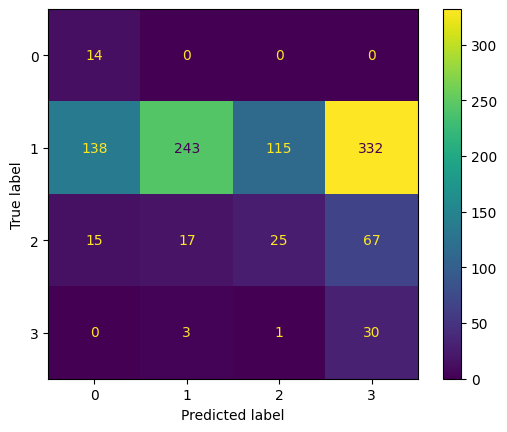

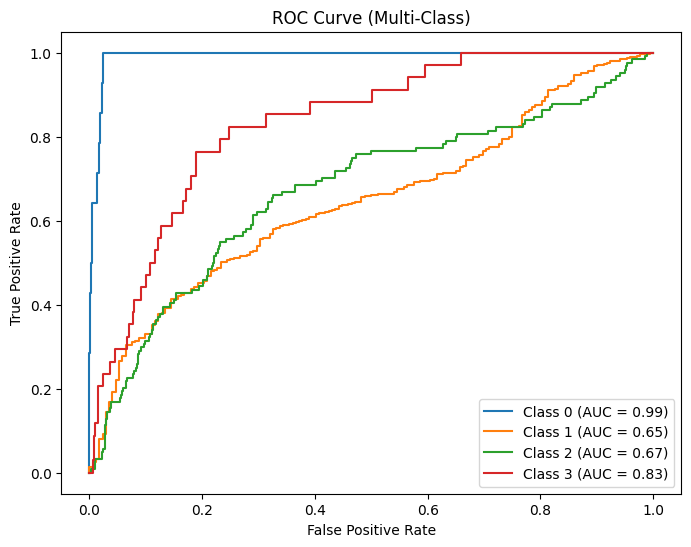

In [85]:
selected_features_25 = feature_selection_evaluate(25, train_X, train_y1, valid_X, valid_y1)

Selected features:  Index(['Start_Time', 'End_Time', 'Distance(mi)', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Traffic_Signal', 'Duration', 'Region', 'State_Others', 'Weather_Year',
       'Weather_Month', 'Weather_Day'],
      dtype='object')
Accuracy: 0.315
Accuracy within 1 class: 0.644
F1-score (Macro): 0.24181072390903918
F1-score (Weighted): 0.39833098553142904
Kendall's Tau: 0.1623599127189523
Weighted Kappa: 0.11281294473224468
              precision    recall  f1-score   support

           0       0.09      1.00      0.17        14
           1       0.92      0.29      0.44       828
           2       0.20      0.27      0.23       124
           3       0.07      0.85      0.13        34

    accuracy                           0.32      1000
   macro avg       0.32      0.60      0.24      1000
weighted avg       0.79      0.32      0.40      1000



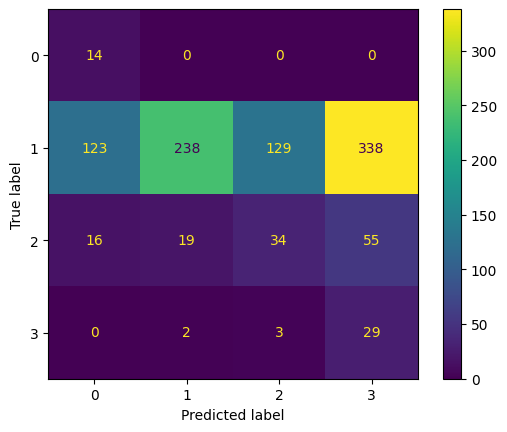

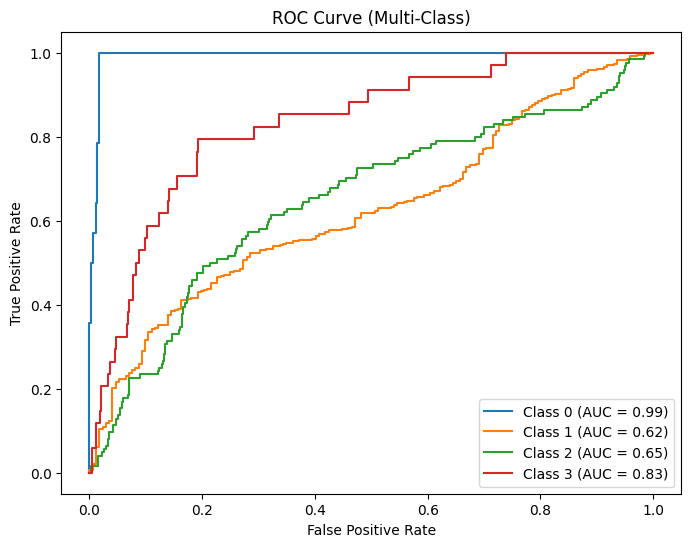

In [86]:
selected_features_15 = feature_selection_evaluate(15, train_X, train_y1, valid_X, valid_y1)

Selected features:  Index(['Start_Time', 'End_Time', 'Distance(mi)', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Crossing', 'Stop', 'Traffic_Signal', 'Duration', 'Region',
       'State_Others', 'State_TX', 'Weather_Year', 'Weather_Month',
       'Weather_Day', 'Weather_Hour', 'Weather_Day_of_Week_Saturday'],
      dtype='object')
Accuracy: 0.338
Accuracy within 1 class: 0.657
F1-score (Macro): 0.253143739199677
F1-score (Weighted): 0.4262995111225856
Kendall's Tau: 0.19114291000314038
Weighted Kappa: 0.1320567227365208
              precision    recall  f1-score   support

           0       0.09      1.00      0.16        14
           1       0.93      0.31      0.47       828
           2       0.23      0.27      0.25       124
           3       0.07      0.91      0.14        34

    accuracy                           0.34      1000
   macro avg       0.33      0.62      0.25      1000
weighted avg       0.80      0.34    

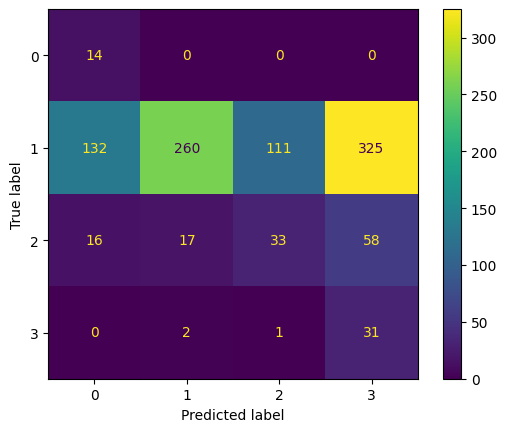

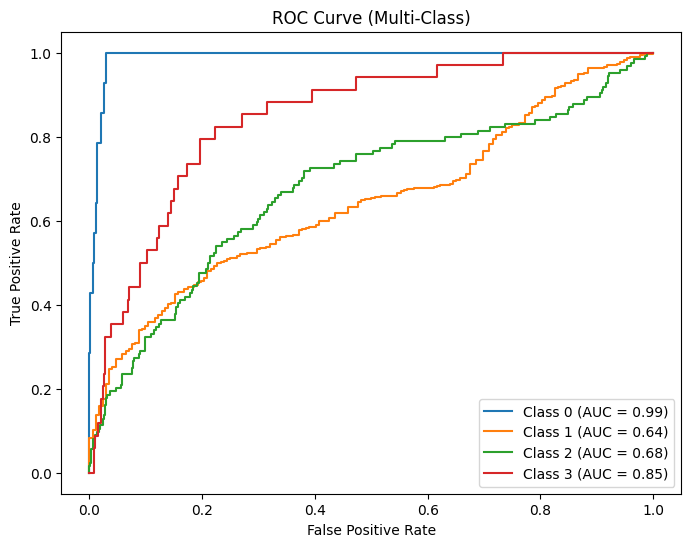

In [87]:
selected_features_20 = feature_selection_evaluate(20, train_X, train_y1, valid_X, valid_y1)

Selected features:  Index(['Wind_Direction_NE', 'Weather_Day_of_Week_Saturday',
       'Weather_Day_of_Week_Wednesday', 'Start_Time', 'End_Time',
       'Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Crossing',
       'Stop', 'Traffic_Signal', 'Duration', 'Region', 'State_CA',
       'State_Others', 'State_TX', 'City_Charlotte', 'City_Los Angeles',
       'City_Others', 'Weather_Year', 'Weather_Month', 'Weather_Day',
       'Weather_Hour'],
      dtype='object')
Accuracy: 0.308
Accuracy within 1 class: 0.644
F1-score (Macro): 0.23374476272722527
F1-score (Weighted): 0.39166290990704583
Kendall's Tau: 0.17924599641773695
Weighted Kappa: 0.12285947810138942
              precision    recall  f1-score   support

           0       0.08      1.00      0.15        14
           1       0.93      0.28      0.43       828
           2       0.20      0.24      0.22       124
           3       0.07      0.91  

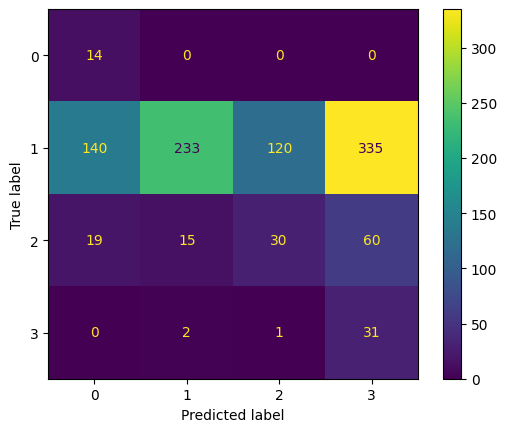

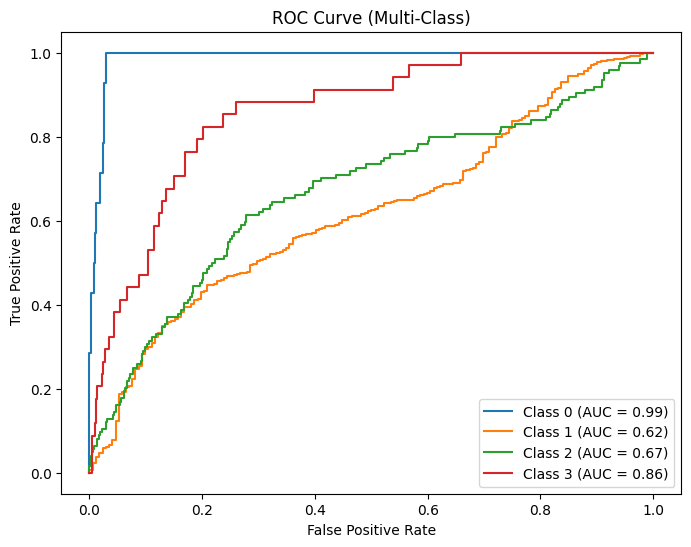

In [38]:
selected_features_27 = feature_selection_evaluate(27, train_X, train_y1, valid_X, valid_y1)

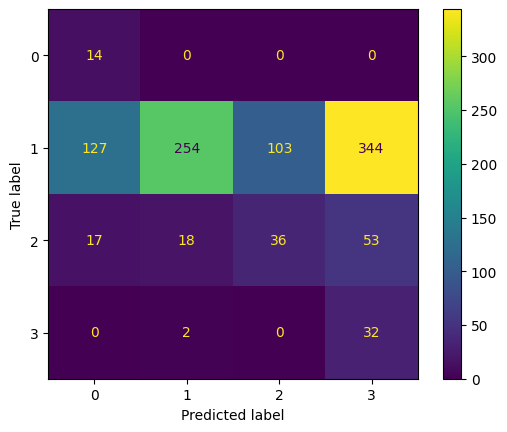

In [154]:
ConfusionMatrixDisplay.from_predictions(valid_y1, y_pred)

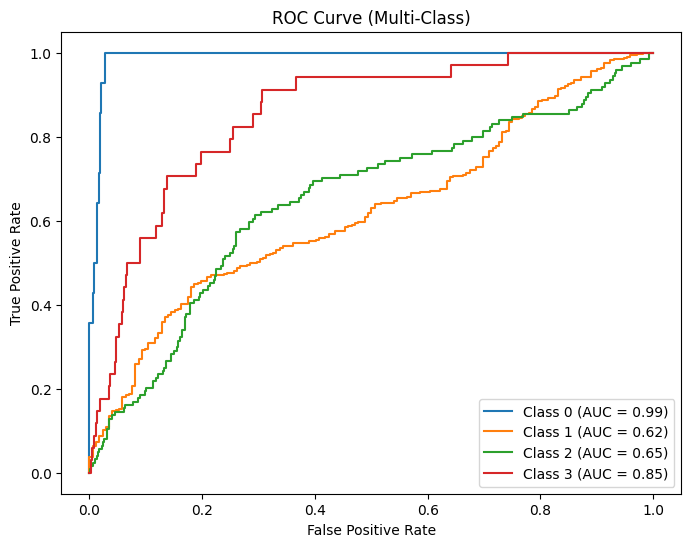

In [155]:
y_true_bin = label_binarize(valid_y1, classes=np.unique(valid_y1))

n_classes = y_true_bin.shape[1]
plt.figure(figsize=(8,6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multi-Class)")
plt.legend()
plt.show()

# Feature Selection + Fine-tuning

Best optimzer score:  -1.5258749999999999
Best parameters:  OrderedDict([('colsample_bytree', 0.7932525766563249), ('learning_rate', 1.0), ('max_depth', 256), ('n_estimators', 236), ('num_leaves', 289), ('reg_alpha', 16.33647521056463), ('reg_lambda', 2.459413339554142), ('subsample', 0.8218641810885775), ('subsample_freq', 8)])
######### Evaluate Test Data Fit #########
Accuracy: 0.408
Accuracy within 1 class: 0.746
F1-score (Macro): 0.28737343174401014
F1-score (Weighted): 0.48987745557522444
Kendall's Tau: 0.1593096737732065
Weighted Kappa: 0.13210024049925373
              precision    recall  f1-score   support

           0       0.12      1.00      0.22        14
           1       0.87      0.40      0.55       828
           2       0.18      0.29      0.22       124
           3       0.09      0.79      0.16        34

    accuracy                           0.41      1000
   macro avg       0.32      0.62      0.29      1000
weighted avg       0.75      0.41      0.49      1

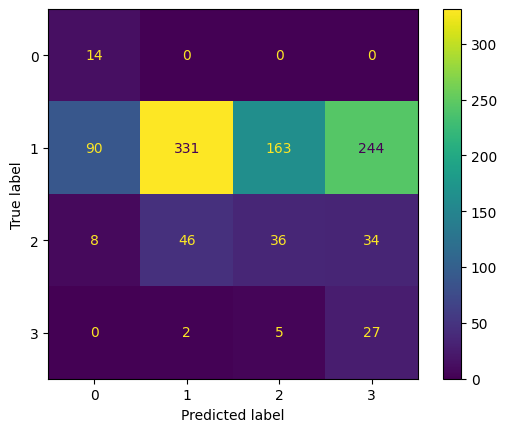

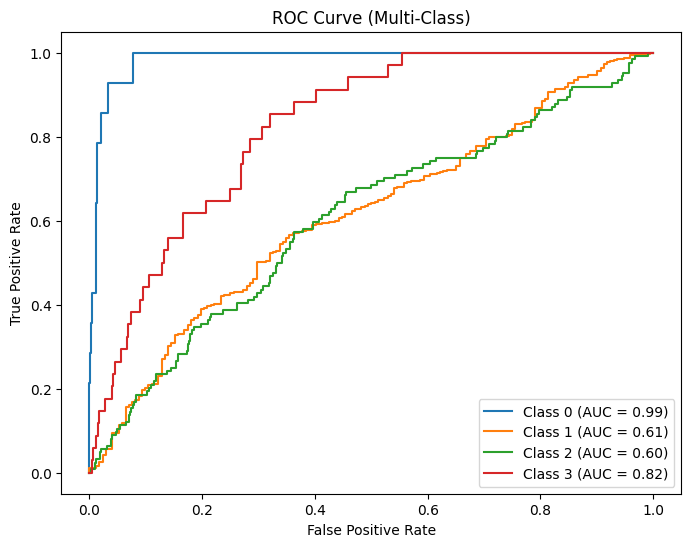

######### Evaluate Train Data Fit #########
Accuracy: 0.647375
Accuracy within 1 class: 0.904
F1-score (Macro): 0.6316916655210632
F1-score (Weighted): 0.6316916655210633
Kendall's Tau: 0.6899488997106926
Weighted Kappa: 0.7559185171591117
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2000
           1       0.55      0.48      0.51      2000
           2       0.55      0.36      0.44      2000
           3       0.61      0.85      0.71      2000

    accuracy                           0.65      8000
   macro avg       0.64      0.65      0.63      8000
weighted avg       0.64      0.65      0.63      8000



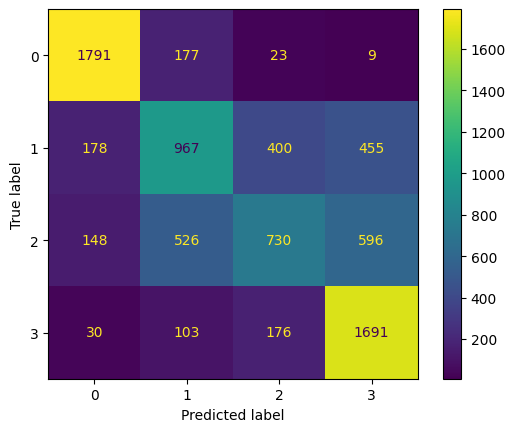

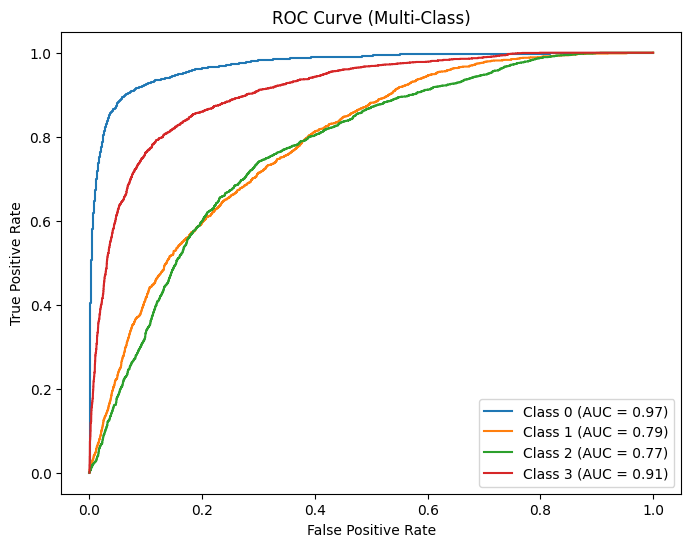

In [88]:
scoring_mse = make_scorer(mean_squared_error, greater_is_better=False)

scoring_mae = make_scorer(mean_absolute_error, greater_is_better=False)

search_spaces = {
    'learning_rate': Real(0.01, 1.0, 'log-uniform'),
    'n_estimators': Integer(30, 5000),
    'num_leaves': Integer(2, 512),                       # Maximum tree leaves for base learners
    'max_depth': Integer(-1, 256),                       # Maximum tree depth for base learners, <=0 means no limit
    'subsample': Real(0.01, 1.0, 'uniform'),             # Subsample ratio of the training instance
    'subsample_freq': Integer(1, 10),                    # Frequency of subsample, <=0 means no enable
    'colsample_bytree': Real(0.01, 1.0, 'uniform'),      # Subsample ratio of columns when constructing each tree
    'reg_lambda': Real(0.5, 100.0, 'log-uniform'),      # L2 regularization
    'reg_alpha': Real(0.5, 100.0, 'log-uniform'),       # L1 regularization
   }

best_model_mse, best_model_params = tune_evaluate(scoring_mse, search_spaces, train_X[selected_features_20], train_y1, valid_X[selected_features_20], valid_y1)

Best optimzer score:  -0.9867500000000001
Best parameters:  OrderedDict([('colsample_bytree', 0.8514495888372569), ('learning_rate', 1.0), ('max_depth', -1), ('n_estimators', 1391), ('num_leaves', 347), ('reg_alpha', 0.5), ('reg_lambda', 16.530355036060755), ('subsample', 0.8966620144249053), ('subsample_freq', 6)])
######### Evaluate Test Data Fit #########
Accuracy: 0.309
Accuracy within 1 class: 0.643
F1-score (Macro): 0.22541014679496446
F1-score (Weighted): 0.39264371046653646
Kendall's Tau: 0.11507698337958265
Weighted Kappa: 0.09117167674183502
              precision    recall  f1-score   support

           0       0.08      1.00      0.15        14
           1       0.88      0.29      0.44       828
           2       0.17      0.20      0.18       124
           3       0.07      0.82      0.13        34

    accuracy                           0.31      1000
   macro avg       0.30      0.58      0.23      1000
weighted avg       0.75      0.31      0.39      1000



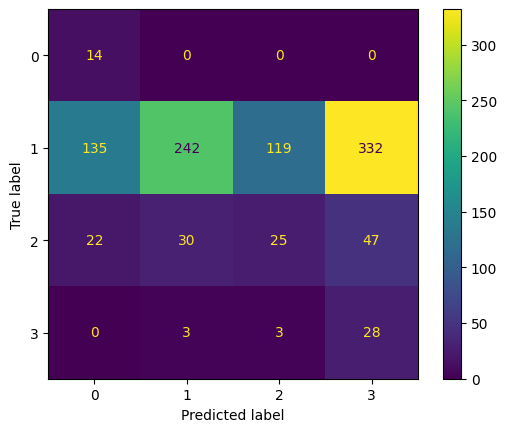

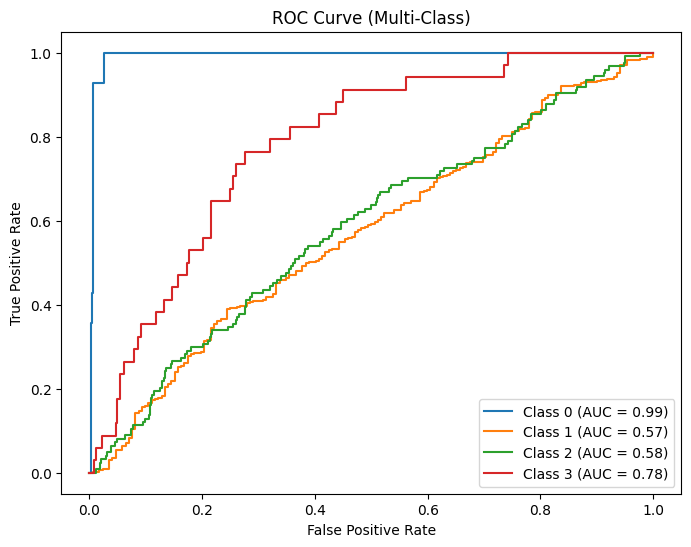

######### Evaluate Train Data Fit #########
Accuracy: 0.99975
Accuracy within 1 class: 1.0
F1-score (Macro): 0.9997500312109512
F1-score (Weighted): 0.9997500312109511
Kendall's Tau: 0.9998333541562533
Weighted Kappa: 0.9998999899989999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2000
           2       1.00      1.00      1.00      2000
           3       1.00      1.00      1.00      2000

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



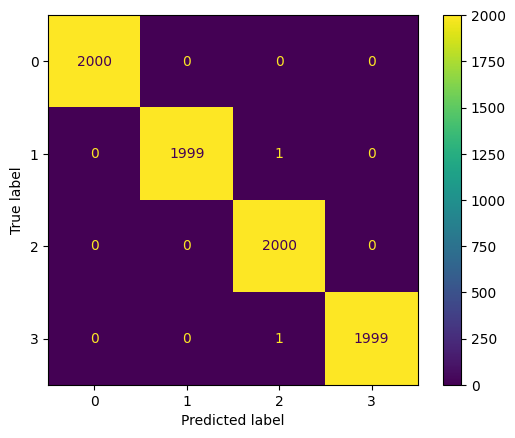

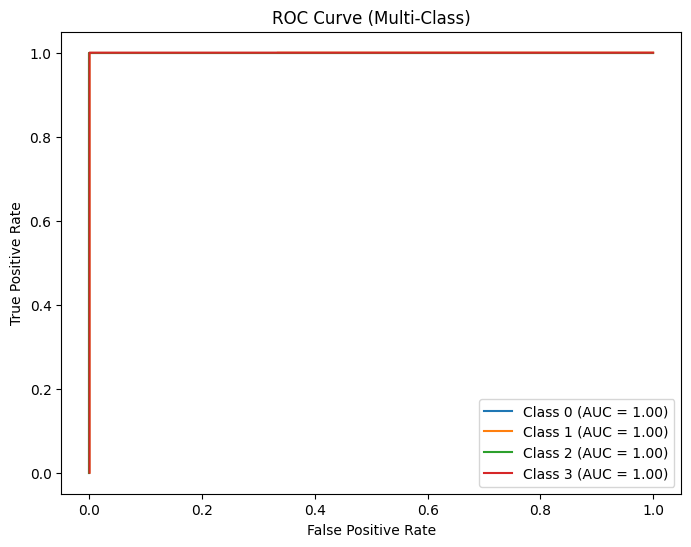

In [89]:
best_model_mae, best_params_mae = tune_evaluate(scoring_mae, search_spaces, train_X[selected_features_20], train_y1, valid_X[selected_features_20], valid_y1)

/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: ov

Best optimzer score:  0.15523767153624463
Best parameters:  OrderedDict([('colsample_bytree', 1.0), ('learning_rate', 1.0), ('max_depth', 256), ('n_estimators', 3452), ('num_leaves', 373), ('reg_alpha', 0.5), ('reg_lambda', 0.5), ('subsample', 1.0), ('subsample_freq', 10)])
######### Evaluate Test Data Fit #########
Accuracy: 0.306
Accuracy within 1 class: 0.693
F1-score (Macro): 0.229538336496558
F1-score (Weighted): 0.38452281735458305
Kendall's Tau: 0.08958173324748779
Weighted Kappa: 0.07019223988698986
              precision    recall  f1-score   support

           0       0.07      1.00      0.14        14
           1       0.88      0.28      0.42       828
           2       0.19      0.34      0.25       124
           3       0.06      0.62      0.12        34

    accuracy                           0.31      1000
   macro avg       0.30      0.56      0.23      1000
weighted avg       0.75      0.31      0.38      1000



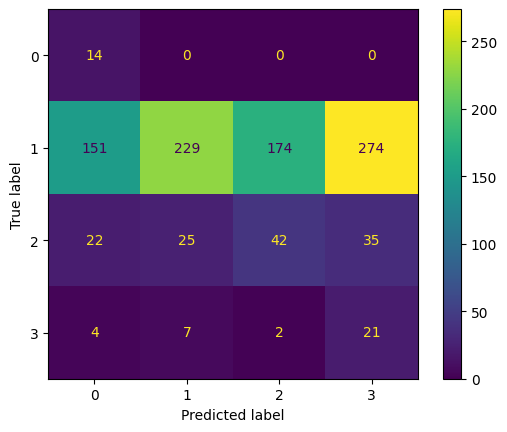

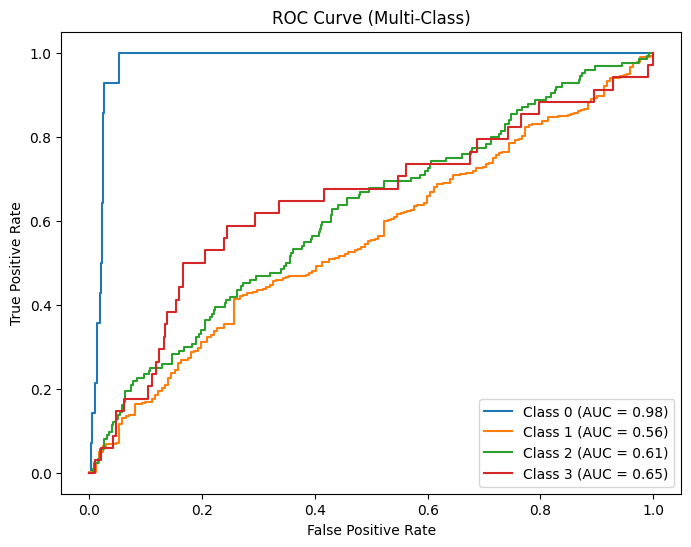

######### Evaluate Train Data Fit #########
Accuracy: 0.999625
Accuracy within 1 class: 1.0
F1-score (Macro): 0.9996250312343771
F1-score (Weighted): 0.999625031234377
Kendall's Tau: 0.9997500208281257
Weighted Kappa: 0.99985
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2000
           2       1.00      1.00      1.00      2000
           3       1.00      1.00      1.00      2000

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



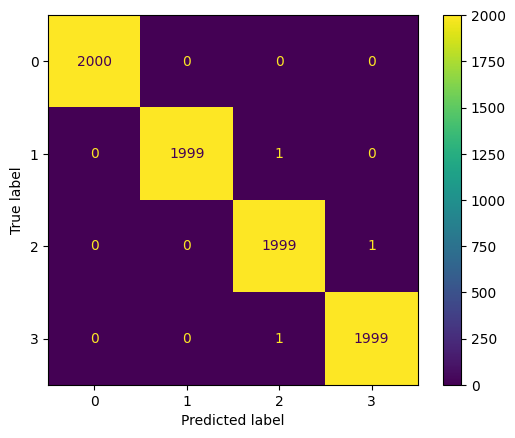

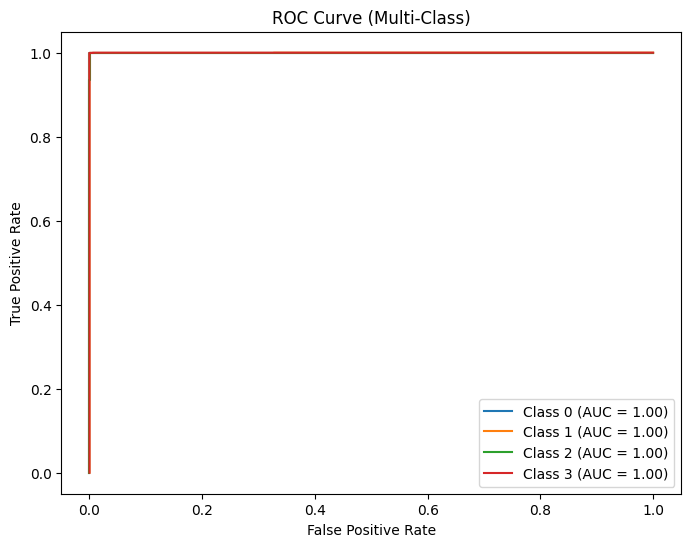

In [90]:
scoring_f1 = make_scorer(f1_score, average="macro", greater_is_better=True)
best_model_f1, best_params_f1 = tune_evaluate(scoring_f1, search_spaces, train_X[selected_features_20], train_y1, valid_X[selected_features_20], valid_y1)

# Evaluate on Test Set

Accuracy: 0.425
Accuracy within 1 class: 0.753
F1-score (Macro): 0.25094607004372477
F1-score (Weighted): 0.5298219468714357
Kendall's Tau: 0.12369211519103518
Weighted Kappa: 0.08857580482689154
              precision    recall  f1-score   support

           0       0.06      1.00      0.12         6
           1       0.91      0.43      0.59       857
           2       0.16      0.28      0.20       119
           3       0.05      0.83      0.10        18

    accuracy                           0.42      1000
   macro avg       0.30      0.64      0.25      1000
weighted avg       0.80      0.42      0.53      1000



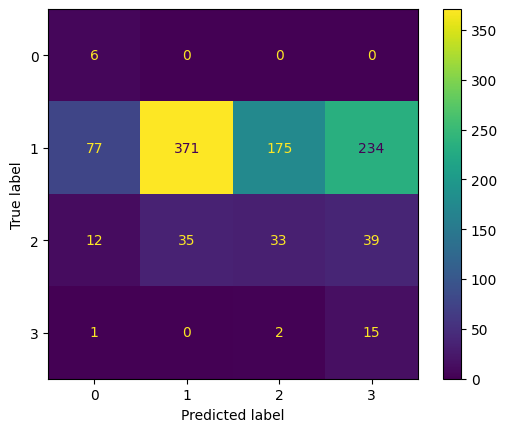

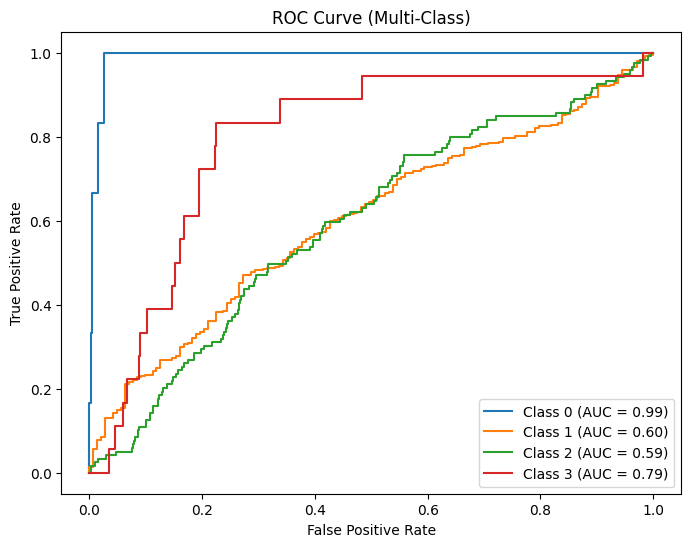

In [91]:
## Evalute on Finetuned model + all features

y_pred = best_model_mse1.predict(test_X)
y_pred_prob = best_model_mse1.predict_proba(test_X)

evaluate_results(y_pred, y_pred_prob, test_y1)

Accuracy: 0.401
Accuracy within 1 class: 0.732
F1-score (Macro): 0.24363912077422284
F1-score (Weighted): 0.5087668638367775
Kendall's Tau: 0.10396661493132878
Weighted Kappa: 0.06978030225227727
              precision    recall  f1-score   support

           0       0.05      1.00      0.10         6
           1       0.92      0.40      0.56       857
           2       0.19      0.34      0.24       119
           3       0.04      0.67      0.08        18

    accuracy                           0.40      1000
   macro avg       0.30      0.60      0.24      1000
weighted avg       0.81      0.40      0.51      1000



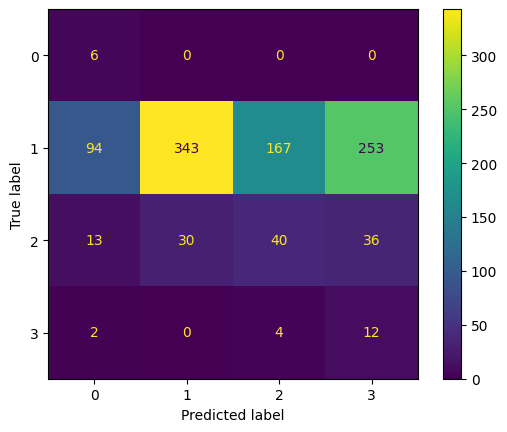

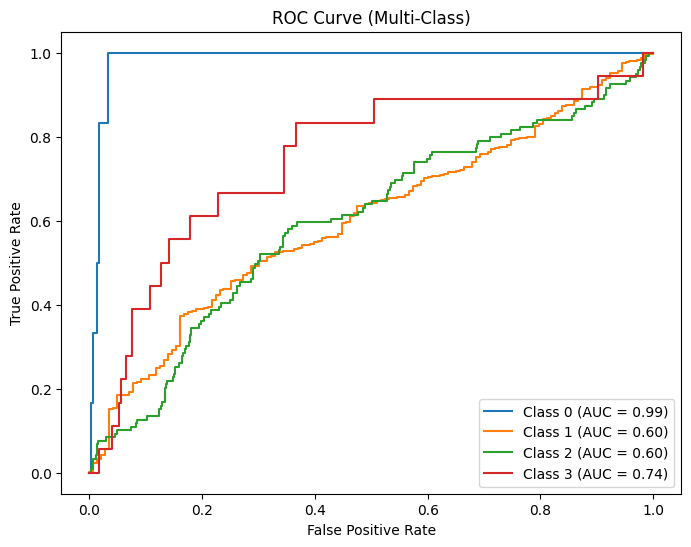

In [92]:
## Evaluate on Finetuned model + selected features
y_pred = best_model_mse.predict(test_X[selected_features_20])
y_pred_prob = best_model_mse.predict_proba(test_X[selected_features_20])

evaluate_results(y_pred, y_pred_prob, test_y1)

Accuracy: 0.416
Accuracy within 1 class: 0.74
F1-score (Macro): 0.24288155658879304
F1-score (Weighted): 0.5205894828055527
Kendall's Tau: 0.08444362925625352
Weighted Kappa: 0.061163581102025355
              precision    recall  f1-score   support

           0       0.05      0.83      0.10         6
           1       0.90      0.42      0.58       857
           2       0.17      0.29      0.21       119
           3       0.04      0.72      0.08        18

    accuracy                           0.42      1000
   macro avg       0.29      0.57      0.24      1000
weighted avg       0.79      0.42      0.52      1000



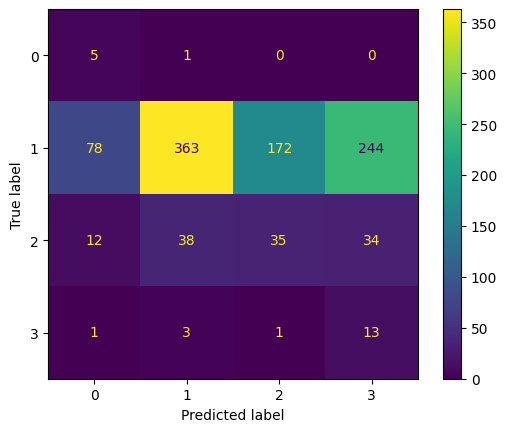

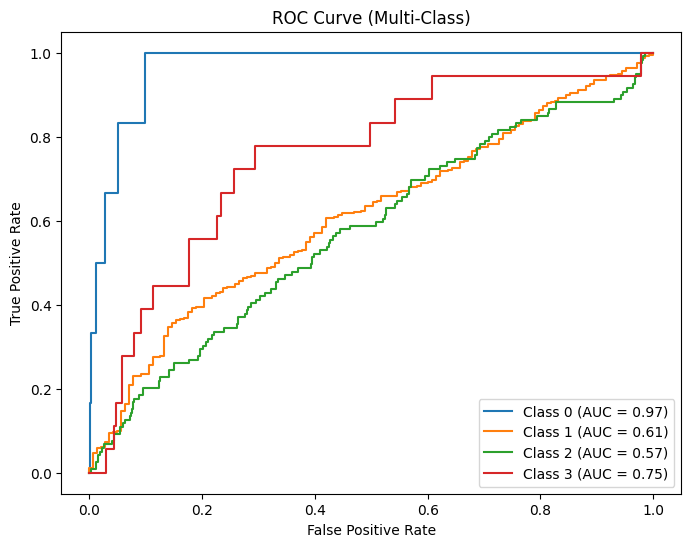

In [72]:
model = LGBMOrdinal(
    colsample_bytree=1.0,
    learning_rate=0.8389367929885553,
    max_depth=137,
    n_estimators=1404,
    num_leaves=311,
    reg_alpha=14.709900732508682,
    reg_lambda=0.8698434487970176,
    subsample=1.0,
    subsample_freq=5
)

model.fit(train_X, train_y1)
y_pred = model.predict(test_X)
y_pred_prob = model.predict_proba(test_X)

evaluate_results(y_pred, y_pred_prob, test_y1)